# Name : Vikram krishnareddy
student id: 3220965

# A03: Sampling

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE


In [14]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


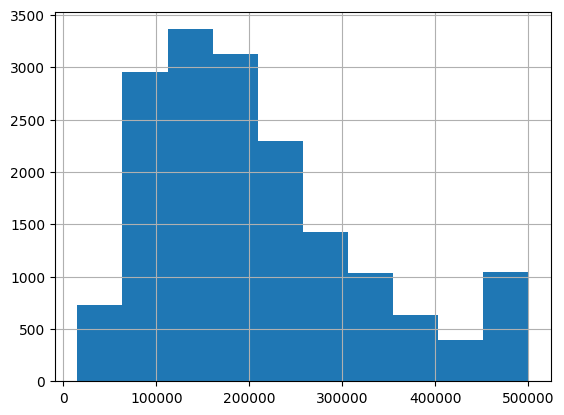

In [16]:
import matplotlib.pyplot as plt
df['median_house_value'].hist ()
plt.show()

In [17]:
# create a new target variable for SMOTE
import numpy as np

# nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)
df['median_house_value'].value_counts()

,count
median_house_value,
1,15304
0,1696


# Q1.Split data into train and test

Remember, your dataset should be split into train and test FIRST so that the test dataset retains the original distribution of 0s and 1s. No SMOTE data in the test partition - your boss only cares about real rows!

In [18]:

from sklearn.model_selection import train_test_split

X = df.drop(columns=['median_house_value'])  # X = all input features
y = df['median_house_value']  # y = target variable

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


print("Train distribution:",y_train.value_counts())
print("Test distribution:", y_test.value_counts())


Train distribution: median_house_value
1    12243
0     1357
Name: count, dtype: int64
Test distribution: median_house_value
1    3061
0     339
Name: count, dtype: int64


# Q2. Majority Undersampling
Perform majority undersampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

Before: median_house_value
1    12243
0     1357
Name: count, dtype: int64
After: median_house_value
0    1357
1    1357
Name: count, dtype: int64


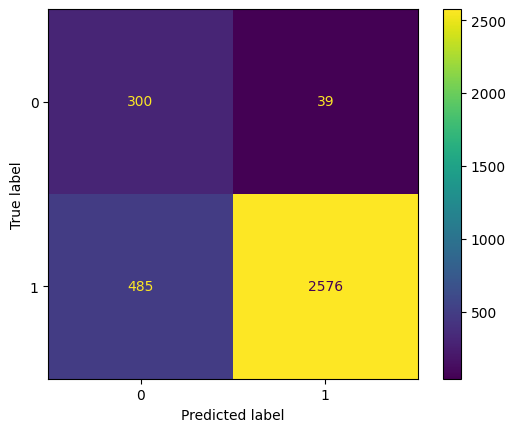

              precision    recall  f1-score   support

           0       0.38      0.88      0.53       339
           1       0.99      0.84      0.91      3061

    accuracy                           0.85      3400
   macro avg       0.68      0.86      0.72      3400
weighted avg       0.92      0.85      0.87      3400



In [19]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


# createating  undersampler
rus = RandomUnderSampler(random_state=42)

# applying  undersampling on training data
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


# check class balance before vs after
print("Before:", y_train.value_counts())
print("After:", y_train_under.value_counts())


# training the model on undersampled training set
model = LogisticRegression(max_iter=2000)
model.fit(X_train_under, y_train_under)


# predicting  using the  test set
preds = model.predict(X_test)


# confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()
plt.show()


# classification report
print(classification_report(y_test, preds))


* Majority undersampling balanced the classes by reducing the number of majority samples in the training set.

* The model detected the minority class much better (high recall = 0.88), meaning most rare cases were correctly identified.

* However, precision was low (0.38), so many majority samples were wrongly predicted as minority (more false positives).

* Overall accuracy dropped slightly because removing many majority samples caused some loss of information.

# Q3.Minority Oversampling
Perform minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

Before: median_house_value
1    12243
0     1357
Name: count, dtype: int64
After: median_house_value
1    12243
0    12243
Name: count, dtype: int64


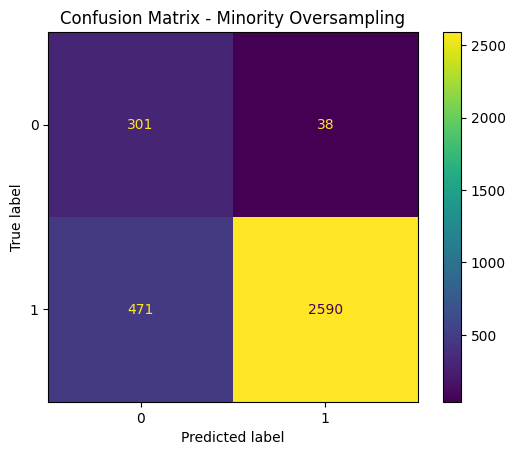

              precision    recall  f1-score   support

           0       0.39      0.89      0.54       339
           1       0.99      0.85      0.91      3061

    accuracy                           0.85      3400
   macro avg       0.69      0.87      0.73      3400
weighted avg       0.93      0.85      0.87      3400



In [20]:
# importing  minority oversampling
from imblearn.over_sampling import RandomOverSampler

# creating oversampler
ros = RandomOverSampler(random_state=42)

# applaying oversampling  on training set
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)


# check class balance before and after
print("Before:", y_train.value_counts())
print("After:", y_train_over.value_counts())


# trainibg  model on oversampled data
model = LogisticRegression(max_iter=2000)
model.fit(X_train_over, y_train_over)


# evaluating  on  test set
preds = model.predict(X_test)


# confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Minority Oversampling")
plt.show()


# classification report
print(classification_report(y_test, preds))




* After minority oversampling, the dataset became balanced because we duplicated the minority class samples.

* The model is now able to catch most of the minority cases (recall = 0.89), which is a big improvement.

* But precision is low (0.39), so many normal cases are wrongly predicted as minority (more false alarms).

* Overall accuracy is almost the same (85%) since we did not remove any data, but repeating rows may cause slight overfitting.

# Q4.  SMOTE
Perform synthetic minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

Before: median_house_value
1    12243
0     1357
Name: count, dtype: int64
After: median_house_value
1    12243
0    12243
Name: count, dtype: int64


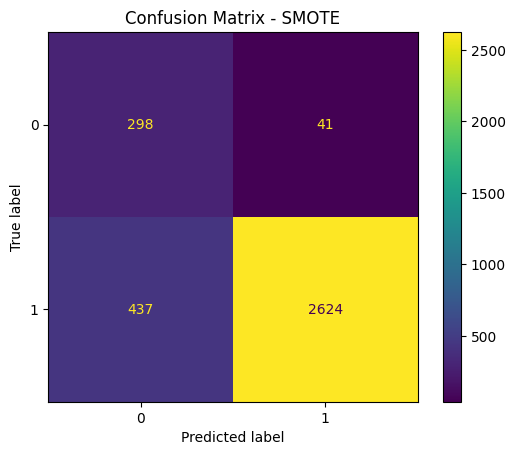

              precision    recall  f1-score   support

           0       0.41      0.88      0.55       339
           1       0.98      0.86      0.92      3061

    accuracy                           0.86      3400
   macro avg       0.70      0.87      0.74      3400
weighted avg       0.93      0.86      0.88      3400



In [21]:
from imblearn.over_sampling import SMOTE

# creating SMOTE sampler
smote = SMOTE(random_state=42)

 # applaying  SMOTE  on training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Before:", y_train.value_counts())
print("After:", y_train_smote.value_counts())

# training  model on SMOTE data
model = LogisticRegression(max_iter=2000)
model.fit(X_train_smote, y_train_smote)

# evaluating on test set
preds = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - SMOTE")
plt.show()


# classification report
print(classification_report(y_test, preds))



* After applying SMOTE, the training data became balanced by creating synthetic minority samples instead of duplicating rows.

* The model detected most minority cases correctly (recall = 0.88), which is a good improvement.

* Precision improved slightly (0.41), so there are fewer false alarms compared to undersampling and oversampling.

* Overall accuracy increased to 86%, so SMOTE gives better and more stable performance among the three methods.

 # Q5. Comparison of 3 methods
Out of the three methods, did any do the best? Make a few comments about what you see.

* All three methods improved minority class detection compared to baseline, but SMOTE performed the best overall.

* Undersampling gave high recall but reduced accuracy because many majority samples were removed.

* Oversampling kept accuracy stable but caused some false positives due to duplicated data.

* SMOTE gave the best balance with higher recall, slightly better precision, and the highest accuracy (86%), so it provided the most stable performance.

# Q6.Reproducibility - run it 30 times or more!

        accuracy  precision     recall
count  35.000000  35.000000  35.000000
mean    0.861059   0.982795   0.860746
std     0.005007   0.001823   0.005945
min     0.851176   0.979213   0.846782
25%     0.858088   0.981655   0.857890
50%     0.861765   0.982573   0.860503
75%     0.863676   0.983991   0.864423
max     0.873235   0.986256   0.877818


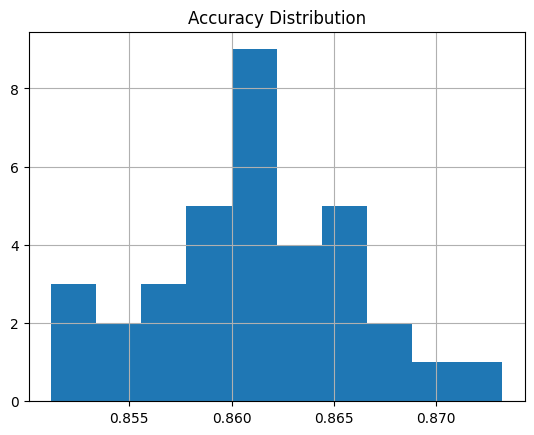

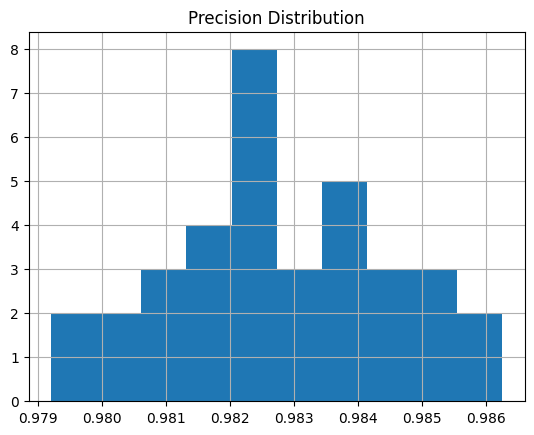

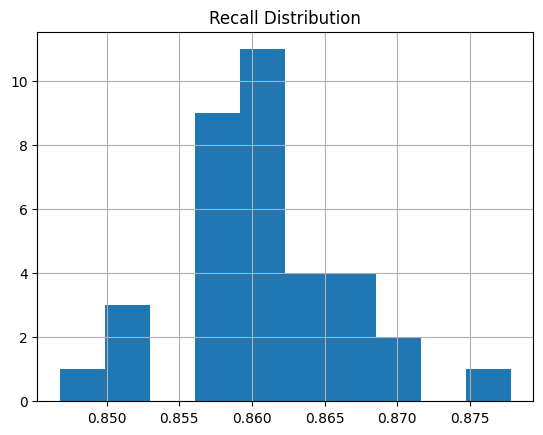

In [22]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

results = []

for i in range(35):

    # split each time with different random_state
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,  stratify=y,  random_state=i)

    # applaying SMOTE on training data
    smote = SMOTE(random_state=i)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # training the model
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train_smote, y_train_smote)

    # evaluate on test set
    preds = model.predict(X_test)

    # store metrics
    results.append([
        accuracy_score(y_test, preds),
        precision_score(y_test, preds, zero_division=0),
        recall_score(y_test, preds, zero_division=0)
    ])


# create dataframe
results_df = pd.DataFrame(results, columns=["accuracy", "precision", "recall"])

print(results_df.describe())


# plot distributions
results_df["accuracy"].hist()
plt.title("Accuracy Distribution")
plt.show()

results_df["precision"].hist()
plt.title("Precision Distribution")
plt.show()

results_df["recall"].hist()
plt.title("Recall Distribution")
plt.show()





# Comments on the repeated experiment

* I ran the experiment 35 times with different random splits each time to check consistency.

* The accuracy, precision, and recall values are very similar across all runs, with very small variation.

* The histogram looks almost like a bell shape, which shows the model performance is stable and not changing much between splits.

* Overall, the model is reliable, and no single run performs extremely better or worse than the others.